## Introduction to Data Visualization with Seaborn

### Jing Song

### Data: Car Dataset https://think.cs.vt.edu/corgis/csv/cars/cars.html 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
%matplotlib inline 
sns.set(style="whitegrid")

In [3]:
cars = pd.read_csv("cars.csv")

In [4]:
cars.head()

,City mpg,Classification,Driveline,Engine Type,Fuel Type,Height,Highway mpg,Horsepower,Hybrid,ID,Length,Make,Model Year,Number of Forward Gears,Torque,Transmission,Width,Year
0,18,Automatic transmission,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,Gasoline,140,25,250,False,2009 Audi A3 3.2,143,Audi,2009 Audi A3,6,236,6 Speed Automatic Select Shift,202,2009
1,22,Automatic transmission,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,Gasoline,140,28,200,False,2009 Audi A3 2.0 T AT,143,Audi,2009 Audi A3,6,207,6 Speed Automatic Select Shift,202,2009
2,21,Manual transmission,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,Gasoline,140,30,200,False,2009 Audi A3 2.0 T,143,Audi,2009 Audi A3,6,207,6 Speed Manual,202,2009
3,21,Automatic transmission,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,Gasoline,140,28,200,False,2009 Audi A3 2.0 T Quattro,143,Audi,2009 Audi A3,6,207,6 Speed Automatic Select Shift,202,2009
4,21,Automatic transmission,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,Gasoline,140,28,200,False,2009 Audi A3 2.0 T Quattro,143,Audi,2009 Audi A3,6,207,6 Speed Automatic Select Shift,202,2009


### 1) Bar chart

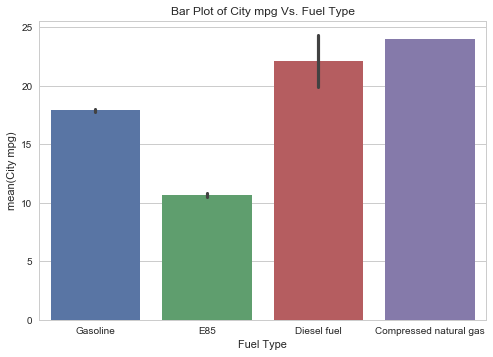

In [6]:
sns.barplot(x="Fuel Type", y='City mpg', data=cars)
plt.title('Bar Plot of City mpg Vs. Fuel Type')

**Above is a bar chart showing City mpg VS. Fuel Type. Cars with Diesel Fuel have higher average City mpg while the variance of City mpg is also much higher.**

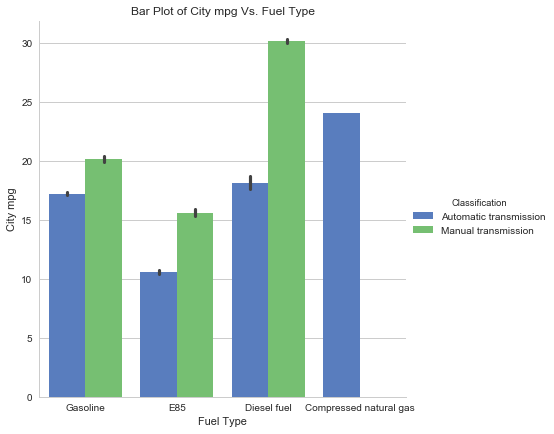

In [7]:
g = sns.factorplot(x="Fuel Type", y="City mpg", hue="Classification", data=cars,
                   size=6, kind="bar", palette="muted", legend_out="True")
plt.title('Bar Plot of City mpg Vs. Fuel Type')

**Above is a grouped bar chart showing City mpg VS. Fuel Type with different transmission types. **

**With the same fuel type, cars with manual transmission have higher City mpg than automatic transmission. Diesel fuel cars with manual transmission have the highest City mpg. ** 

### 2) Histogram

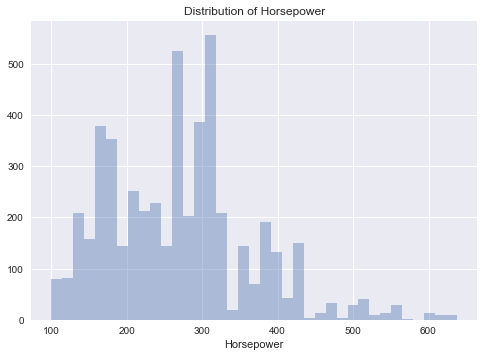

In [8]:
sns.set(style="darkgrid")
# sns.set(style="white", palette="muted", color_codes=True)
sns.distplot(cars['Horsepower'],kde=False)
plt.title('Distribution of Horsepower')

**Above is a histogram for Horsepower. Most cars have Horsepower between 150 and 350.**

### Boxplot

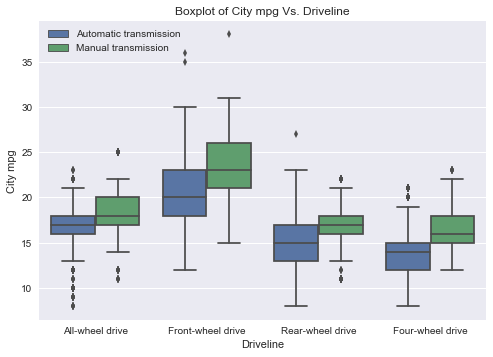

In [10]:
sns.set(style="darkgrid")
sns.boxplot(x="Driveline", y="City mpg", hue="Classification", data=cars);
# specify legend placement
plt.legend(loc='upper left')
plt.title('Boxplot of City mpg Vs. Driveline')

**Above is a boxplot showing City mpg VS. Driveline with different transmission types. **

**Front-wheel drive cars with manual transmission generally have a higher City mpg. **

### 3) Scatter plot - bivariate

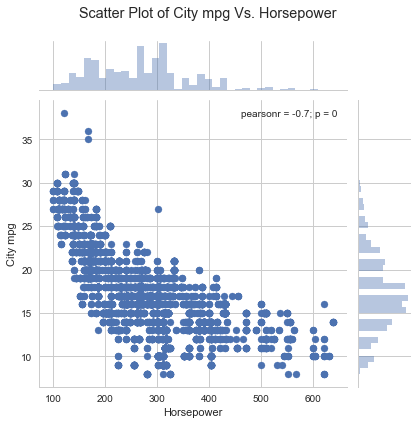

In [26]:
g = sns.jointplot(x="Horsepower", y="City mpg", data=cars)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Scatter Plot of City mpg Vs. Horsepower')
# plt.title('Scatter plot of City mpg Vs. Horsepower')

**Above is a bivariate scatter plot showing City mpg vs Horsepower. The plot is showing a fan shape and the two variables are negatively correlated.**

### 4) Scatter plot - trivariate

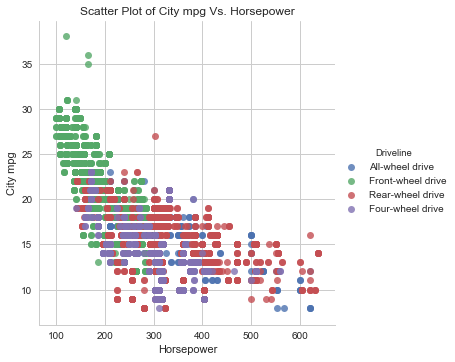

In [22]:
sns.lmplot(x="Horsepower", y="City mpg", hue = "Driveline", data=cars, fit_reg=False)
plt.title('Scatter Plot of City mpg Vs. Horsepower')

**Above is a trivariate scatter plot showing City mpg vs Horsepower with different Driveline. **

**It shows that Front-wheel drive cars with smaller Horsepower have a higher City mpg, while Rear-wheel drive cars with larger Horsepower have a lower City mpg.**

### 5) Swarm plot

CPU times: user 2min 12s, sys: 1.66 s, total: 2min 14s
Wall time: 2min 14s


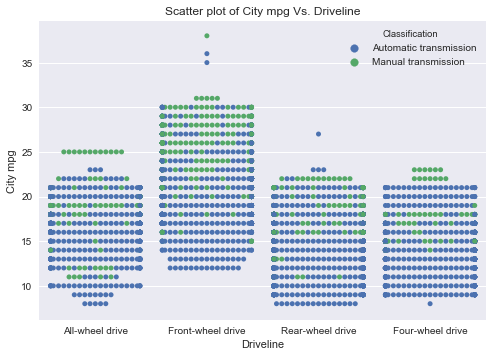

In [15]:
%%time
sns.swarmplot(x="Driveline", y="City mpg", hue="Classification", data=cars)
plt.title('Scatter plot of City mpg Vs. Driveline')

**Above is a swarm plot showing City mpg vs Driveline with different transmission types. It shows that Front-wheel drive cars with manual transmission have a higher City mpg. **

### 6) Faceted Histogram

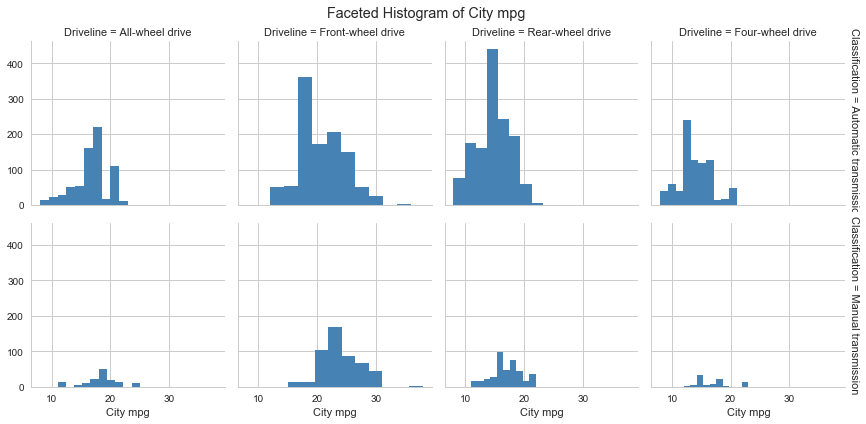

In [17]:
g = sns.FacetGrid(cars, row="Classification", col="Driveline", margin_titles=True)
g.map(plt.hist, "City mpg", color="steelblue", lw=0)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Faceted Histogram of City mpg')

**Above is a Faceted Histogram showing the distribution of City mpg with different Driveline and transmission combinations. Most cars have automatic tranmission while manual tranmission cars with Front-wheel drive have a higher City mpg.**

### 7) Violin Plot

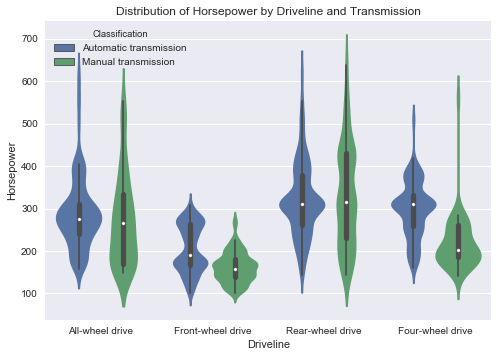

In [17]:
sns.violinplot(x="Driveline", y="Horsepower", hue="Classification", data=cars)
plt.title('Distribution of Horsepower by Driveline and Transmission')

**Above is a violin plot showing Horsepower vs Driveline with different transmission in different colors. It shows that front-wheel drive cars with manual transmission have a lower Horsepower.**

### 8) Strip Plot

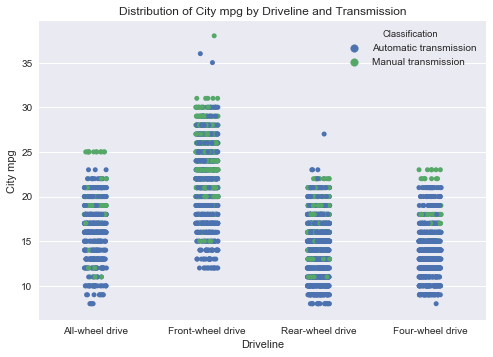

In [19]:
sns.stripplot(x="Driveline", y="City mpg", hue="Classification", data=cars, jitter=True);
plt.title('Distribution of City mpg by Driveline and Transmission')

**Above is a strip plot showing City mpg vs Driveline with different transmission in different colors. It shows that front-wheel drive cars with manual transmission have a higher City mpg.**